In [2]:
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys

print("--sys.version—-")
print(sys.version)

--sys.version—-
3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


## 데이터 불러오기

* Scopus 검색
* 키워드: urban air mobility
* 검색 조건: Title, Abstract, Keywords 내 검색 / Article / English / Journal
* 총 277 documents

In [4]:
data = pd.read_csv('scopus_urbanairmobility_20230523.csv')
data

,Authors,Title,Year,Link,Abstract,Author Keywords
0,"Singh A., Lodge A., Li Y., Widanage W.D., Bara...",A new method to perform lithium-ion battery pa...,2023,https://www.scopus.com/inward/record.uri?eid=2...,Electric Vertical Take-Off and Landing (eVTOL)...,Electric aircraft; eVTOL; Fast charging; Fault...
1,"Wang S., Zhai Y., Zhan X.",Implementation of solution separation-based Ka...,2023,https://www.scopus.com/inward/record.uri?eid=2...,Accurate and safety-assured navigation is dema...,Integrity monitoring; Kalman filter; Multi-sen...
2,Chrit M.,Reconstructing urban wind flows for urban air ...,2023,https://www.scopus.com/inward/record.uri?eid=2...,Advancements in uncrewed aircrafts and communi...,Computational Fluid Dynamics; Data Assimilatio...
3,"Lee H., Jang J.-U., Kim J., Sang Kim Y., Cho J...",True self-reinforced composites enabled by tun...,2023,https://www.scopus.com/inward/record.uri?eid=2...,The development of vehicle bodies based on lig...,Drone; Future mobility; Lightweight structural...
4,"Askarzadeh T., Bridgelall R., Tolliver D.D.",Systematic Literature Review of Drone Utility ...,2023,https://www.scopus.com/inward/record.uri?eid=2...,Drones have recently become a new tool in rail...,Railroad track obstructions; Railway defect id...
...,...,...,...,...,...,...
272,Swartz K.I.,NASA embraces urban air mobility,2019,https://www.scopus.com/inward/record.uri?eid=2...,[No abstract available],NaN
273,"Guffarth D., Knappe M.",Patterns of learning in dynamic technological ...,2019,https://www.scopus.com/inward/record.uri?eid=2...,Not only with respect to the common overlaps w...,Aerospace; Ambidexterity; Automotive; Complex ...
274,Adkins K.A.,Urban flow and small unmanned aerial system op...,2019,https://www.scopus.com/inward/record.uri?eid=2...,The Federal Aviation Administration (FAA) has ...,NaN
275,"Gerdes I., Temme A., Schultz M.",Dynamic airspace sectorisation for flight-cent...,2018,https://www.scopus.com/inward/record.uri?eid=2...,Today's air traffic operations follow the para...,Airspace; Clustering; Controller task load; Dy...


In [5]:
data['Year'].isnull().sum()
#결측치 없음

0

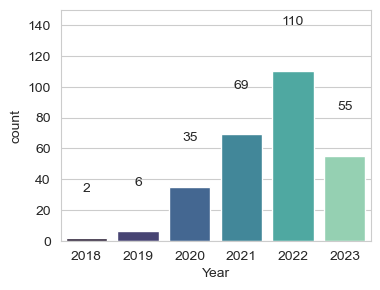

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize = (4,3))

ax = sns.countplot(x = data['Year'], palette = 'mako')

# countplot에 값 표시
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 30, int(height), ha = 'center', size = 10)
ax.set_ylim(0, 150)
plt.show()

In [9]:
#country_data = pd.read_csv('국가별 논문 수.csv')
#country_data

,Country,count
0,United States,384
1,Germany,68
2,South Korea,54
3,Italy,28
4,China,25
5,United Kingdom,16
6,Netherlands,14
7,Canada,13
8,Spain,12
9,Australia,11


In [10]:
#rank = country_data['count'] >= 5
#rank.value_counts()

count
False    29
True     17
Name: count, dtype: int64

In [11]:
#country_data.drop(country_data.index[16:], axis = 0, inplace = True)
#country_data

,Country,count
0,United States,384
1,Germany,68
2,South Korea,54
3,Italy,28
4,China,25
5,United Kingdom,16
6,Netherlands,14
7,Canada,13
8,Spain,12
9,Australia,11


<Axes: xlabel='count', ylabel='Country'>

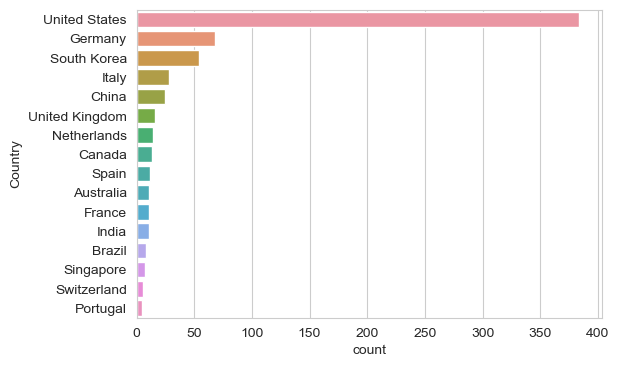

In [12]:
#plt.figure(figsize = (6,4))
#sns.barplot(x = 'count', y = 'Country', data = country_data)

In [9]:
data_ab = data['Abstract']
data_ab

0      Electric Vertical Take-Off and Landing (eVTOL)...
1      Accurate and safety-assured navigation is dema...
2      Advancements in uncrewed aircrafts and communi...
3      The development of vehicle bodies based on lig...
4      Drones have recently become a new tool in rail...
                             ...                        
272                              [No abstract available]
273    Not only with respect to the common overlaps w...
274    The Federal Aviation Administration (FAA) has ...
275    Today's air traffic operations follow the para...
276    Urban air mobility (UAM) refers to a set of ve...
Name: Abstract, Length: 277, dtype: object

## 데이터 전처리

### Tokenization

#### 노이즈 및 불용어 제거

In [10]:
import nltk
from nltk.corpus import stopwords

In [19]:
# 불용어 지정
my_stopword =stopwords.words('english') + ['research', 'implication', 'UAM', 'uam', 'urban', 'air','aircraft', 'mobility', 'paper', 'study', 'analysis', 'method', 'model', 'data']
print(my_stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words = my_stopword, 
                     max_features=2000, min_df=5, max_df=0.5)
review_cv = cv.fit_transform(data_ab)

# LDA 토픽 모델링 실행

### 사이킷런을 이용한 토픽 모델링

In [21]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components = 10, #추출할 topic의 수
                                max_iter=5, 
                                topic_word_prior=0.1, doc_topic_prior=1.0,
                                learning_method='online', 
                                n_jobs= -1, #사용 processor 수
                                random_state=0)

review_topics = lda.fit_transform(review_cv)
print('#shape of review_topics:', review_topics.shape)
print('#Sample of review_topics:', review_topics[0])

gross_topic_weights = np.mean(review_topics, axis=0)
print('#Sum of topic weights of documents:', gross_topic_weights)

print('#shape of topic word distribution:', lda.components_.shape)

#shape of review_topics: (277, 10)
#Sample of review_topics: [0.012 0.012 0.451 0.011 0.122 0.33  0.011 0.027 0.012 0.012]
#Sum of topic weights of documents: [0.029 0.025 0.113 0.024 0.285 0.246 0.019 0.215 0.024 0.018]
#shape of topic word distribution: (10, 1357)


In [22]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end='')
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        #print(", ".join([feature_names[i]+'('+str(topic[i])+')' for i in topic.argsort()[:-n_top_words - 1:-1]]))
        # 위 slicing에서 맨 뒤 -1은 역순을 의미, 역순으로 했을 때 처음부터 n_top_words까지
    print()

print_top_words(lda,cv.get_feature_names_out(), 10)

Topic #0: flow, aerodynamic, flight, propellers, rotorcraft, key, side, propeller, interaction, new
Topic #1: heat, power, conditions, available, system, based, density, operations, non, design
Topic #2: vertiport, demand, evtol, time, design, number, operations, expected, arrival, proposed
Topic #3: population, estimated, areas, boundary, 2019, layer, travel, world, environment, complex
Topic #4: transport, flying, transportation, technology, flight, use, new, systems, factors, results
Topic #5: airspace, traffic, operations, proposed, system, flight, based, algorithm, performance, new
Topic #6: flying, services, car, shared, taxi, transportation, system, cars, pay, digital
Topic #7: noise, rotor, electric, design, flight, evtol, based, wing, vehicles, vertical
Topic #8: airspace, low, spatial, building, flow, topology, high, altitude, highly, design
Topic #9: electric, uavs, design, emissions, comparison, system, power, based, authors, new



n_components: 6, perplexity: 1084.451
n_components: 7, perplexity: 1116.016
n_components: 8, perplexity: 1152.545
n_components: 9, perplexity: 1188.857
n_components: 10, perplexity: 1222.174
n_components: 11, perplexity: 1228.262
n_components: 12, perplexity: 1266.623
n_components: 13, perplexity: 1272.939
n_components: 14, perplexity: 1287.683
n_components: 15, perplexity: 1307.786


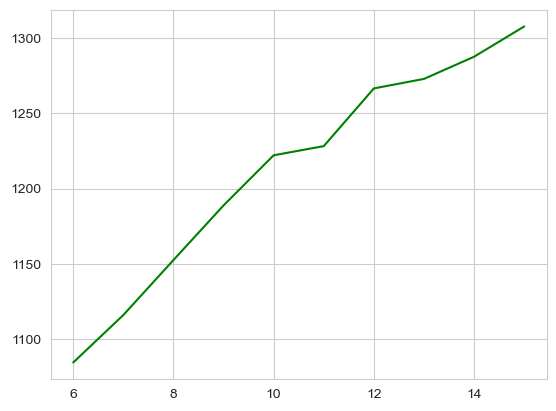

n_components with minimum perplexity: 6


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter, 
                                        topic_word_prior= topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(review_cv, start=6, end=15))

In [24]:
lda = LatentDirichletAllocation(n_components = 6, #추출할 topic의 수를 지정
                                max_iter=20, 
                                topic_word_prior= 0.1, 
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs= -1, 
                                random_state=7)

review_topics = lda.fit_transform(review_cv)

print_top_words(lda, cv.get_feature_names_out(), 10)

Topic #0: demand, vertiport, approach, taxi, based, navigation, time, number, vertiports, landing
Topic #1: noise, wind, impact, rotor, vehicles, aviation, acoustic, results, used, using
Topic #2: electric, design, flight, performance, rotor, power, battery, evtol, propeller, control
Topic #3: transportation, flying, services, transport, infrastructure, new, use, future, taxis, technology
Topic #4: airspace, traffic, operations, proposed, safety, flight, management, based, environments, efficient
Topic #5: system, aerial, uav, new, based, network, performance, systems, results, ground



### 토픽 트렌드로 시간에 따른 주제의 변화 알아내기

In [25]:
# 토픽 트렌드를 찾기 위해서는 각 문서의 날짜(start)와 토픽 분포를 결합해야 한다.
# 날짜에서 연도와 월만 잘라 가져온다.
trend_data = pd.DataFrame(review_topics, columns = ['Topic'+str(i) for i in range(1, 7)])
trend_data = pd.concat([trend_data, data.Year], axis = 1)
trend_data

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Year
0,0.232159,0.041147,0.191492,0.021528,0.052210,0.461465,2023
1,0.655625,0.048102,0.015210,0.016302,0.035707,0.229054,2023
2,0.145835,0.584993,0.014602,0.043756,0.175941,0.034873,2023
3,0.028631,0.182444,0.052238,0.042844,0.190649,0.503194,2023
4,0.018281,0.048271,0.029009,0.473823,0.044921,0.385695,2023
...,...,...,...,...,...,...,...
272,0.177130,0.142857,0.172925,0.192844,0.171386,0.142857,2019
273,0.046692,0.027357,0.055589,0.278873,0.336954,0.254534,2019
274,0.055759,0.235841,0.104626,0.302475,0.249254,0.052045,2019
275,0.099006,0.021943,0.024753,0.172933,0.668377,0.012988,2018


In [26]:
trend = trend_data.groupby(['Year']).mean()
trend

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6
Year,,,,,,
2018,0.129613,0.040173,0.019392,0.244467,0.553671,0.012683
2019,0.120636,0.217132,0.085872,0.180729,0.231468,0.164162
2020,0.226745,0.054249,0.153354,0.336879,0.145706,0.083067
2021,0.212338,0.092250,0.162943,0.217268,0.209077,0.106124
2022,0.173798,0.136090,0.195744,0.201405,0.160227,0.132736
2023,0.182714,0.142410,0.146124,0.177199,0.162491,0.189061


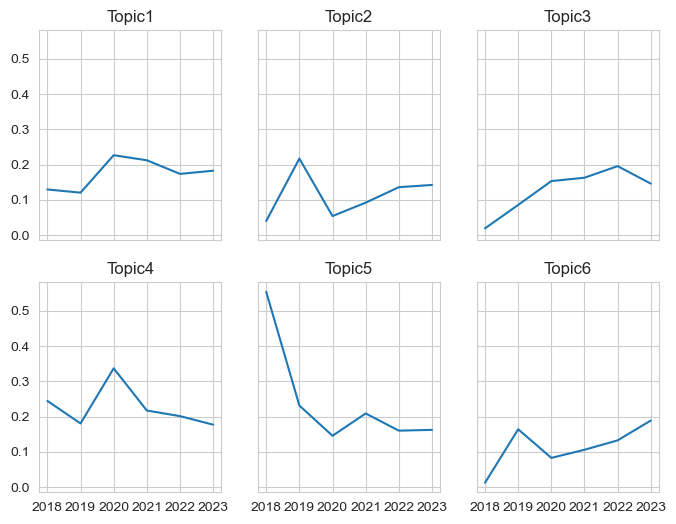

In [33]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

fig, axes = plt.subplots(2, 3,  sharex = 'all', sharey = 'all', figsize = (8,6))
for col, ax in zip(trend.columns.tolist(), axes.ravel()):
    ax.set_title(col)
    ax.xaxis.set_major_locator(MaxNLocator(integer = True)) #연도 표시할 때 소수점 없애는 방법
    ax.plot(trend[col])
plt.show()

### Gensim을 이용한 토픽 모델링

In [34]:
# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) 
    # stopwords 제외
    words = [word for word in tokens if (word not in my_stopword) and len(word) > 2]
    return words

abstract = [tokenizer(data_ab) for data_ab in data_ab]

In [35]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(abstract)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in abstract]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 5597
#Number of unique words after removing rare and common words: 1357
#Number of unique tokens: 1357
#Number of documents: 277


In [38]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)
# corpus는 doc2bow()를 이용해 변환된 카운터 벡터 리스트

CPU times: total: 828 ms
Wall time: 848 ms


In [39]:
model.print_topics(num_words=10)
# print_topics 함수는 각 토픽의 상위 비중 단어를 볼 수 있는 gensim 패키지 내장 함수이다.
# num_topics 매개변수로 보고 싶은 토픽의 수를, num_words로 각 토픽의 상위 단어 수를 지정할 수 있다.

[(0,
  '0.030*"airspace" + 0.012*"traffic" + 0.011*"operations" + 0.009*"system" + 0.009*"proposed" + 0.008*"demand" + 0.008*"unmanned" + 0.007*"problem" + 0.007*"vehicles" + 0.007*"transportation"'),
 (1,
  '0.013*"electric" + 0.011*"systems" + 0.011*"performance" + 0.011*"system" + 0.010*"based" + 0.010*"navigation" + 0.009*"battery" + 0.009*"design" + 0.007*"new" + 0.006*"hybrid"'),
 (2,
  '0.016*"noise" + 0.010*"services" + 0.009*"rotor" + 0.009*"operations" + 0.008*"vehicles" + 0.008*"aviation" + 0.008*"companies" + 0.008*"development" + 0.007*"flight" + 0.006*"areas"'),
 (3,
  '0.012*"rotor" + 0.009*"services" + 0.008*"based" + 0.008*"challenges" + 0.008*"high" + 0.007*"also" + 0.006*"networks" + 0.006*"flight" + 0.006*"technology" + 0.006*"vehicle"'),
 (4,
  '0.015*"propeller" + 0.014*"flow" + 0.013*"wind" + 0.012*"aerodynamic" + 0.009*"propellers" + 0.008*"results" + 0.008*"based" + 0.008*"noise" + 0.008*"performance" + 0.008*"proposed"'),
 (5,
  '0.012*"noise" + 0.011*"infrast

* 각 토픽의 번호와 함께 토픽의 상위 비중 단어와 비중을 함께 볼 수 있다.

In [40]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])

#topic distribution of the first document:  [(1, 0.4851388), (4, 0.1500482), (6, 0.35780975)]


In [41]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.024749  0.014756       1        1  19.157830
8      0.044982 -0.018446       2        1  16.217313
0      0.017038  0.049187       3        1  12.020005
4     -0.161422  0.009210       4        1   9.774857
7     -0.033767  0.042451       5        1   8.827079
6      0.035216  0.081469       6        1   8.655631
9      0.100133 -0.038033       7        1   8.526814
5      0.008899  0.003453       8        1   6.865339
2      0.043968 -0.002408       9        1   5.249189
3     -0.030299 -0.141639      10        1   4.705943, topic_info=         Term        Freq       Total Category  logprob  loglift
503  airspace  170.000000  170.000000  Default  30.0000  30.0000
921    flying   79.000000   79.000000  Default  29.0000  29.0000
962     noise  119.000000  119.000000  Default  28.0000  28.0000
209      cars   38.000000   38.000000  Default  27.0000  27.0000
594     rotor   96.000000   96.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
512   control    6.175899   92.280125  Topic10  -5.3033   0.3522
194      time    6.231461  122.517486  Topic10  -5.2944   0.0777
125    system    6.350399  170.151333  Topic10  -5.2755  -0.2318
359    design    6.198693  170.664628  Topic10  -5.2996  -0.2590
5     authors    5.980721   89.218054  Topic10  -5.3354   0.3538

[642 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
897       3  0.528028   2011
897       4  0.105606   2011
897       5  0.105606   2011
897       6  0.211211   2011
897      10  0.105606   2011
...     ...       ...    ...
783       9  0.058259  would
783      10  0.116518  would
430       2  0.650690    yet
430       3  0.260276    yet
430      10  0.130138    yet

[2459 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 9, 1, 5, 8, 7, 10, 6, 3, 4])

In [42]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.8840911364605861


num_topics: 6, perplexity: -7.185, coherence: -1.529
num_topics: 7, perplexity: -7.250, coherence: -1.479
num_topics: 8, perplexity: -7.310, coherence: -1.503
num_topics: 9, perplexity: -7.369, coherence: -1.519
num_topics: 10, perplexity: -7.420, coherence: -1.538
num_topics: 11, perplexity: -7.480, coherence: -1.574
num_topics: 12, perplexity: -7.538, coherence: -1.625
num_topics: 13, perplexity: -7.595, coherence: -1.635
num_topics: 14, perplexity: -7.633, coherence: -1.609
num_topics: 15, perplexity: -7.684, coherence: -1.743


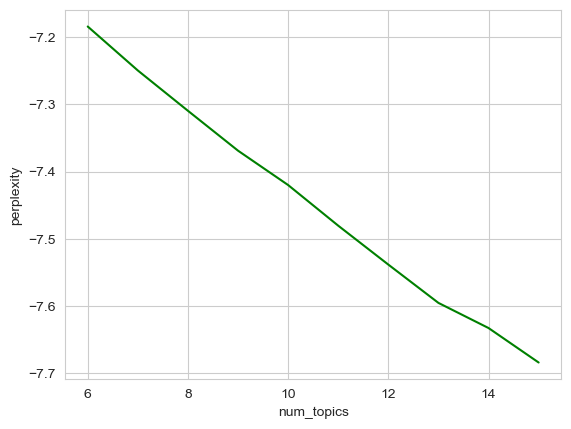

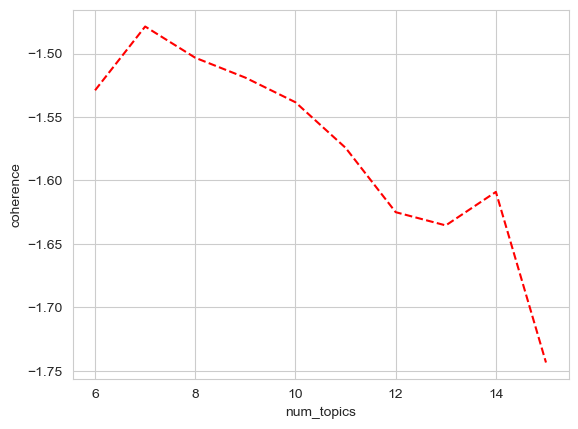

In [43]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

show_coherence(corpus, dictionary, start=6, end=15)

* 혼란도는 토픽 수가 작을수록 좋은 경향성을 보이고, 토픽 응집도는 7일 때 가장 좋다.

In [44]:
from gensim.models import LdaModel

num_topics = 6 # 혼란도와 토픽 응집도 분포에 따라 토픽의 개수를 10개에서 6개로 조정
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: total: 875 ms
Wall time: 881 ms


In [45]:
model.print_topics(num_words=10)

[(0,
  '0.022*"airspace" + 0.015*"traffic" + 0.009*"operations" + 0.009*"demand" + 0.008*"system" + 0.008*"proposed" + 0.007*"based" + 0.007*"transportation" + 0.006*"vehicles" + 0.006*"using"'),
 (1,
  '0.011*"system" + 0.011*"electric" + 0.010*"design" + 0.010*"performance" + 0.010*"based" + 0.009*"evtol" + 0.009*"systems" + 0.007*"new" + 0.007*"navigation" + 0.007*"proposed"'),
 (2,
  '0.012*"noise" + 0.011*"taxi" + 0.011*"vehicles" + 0.008*"flight" + 0.007*"services" + 0.007*"results" + 0.007*"taxis" + 0.007*"cost" + 0.007*"using" + 0.007*"demand"'),
 (3,
  '0.016*"flying" + 0.014*"rotor" + 0.010*"cars" + 0.009*"passenger" + 0.008*"based" + 0.008*"design" + 0.007*"electric" + 0.007*"systems" + 0.006*"simulation" + 0.006*"car"'),
 (4,
  '0.012*"propeller" + 0.012*"flow" + 0.011*"wind" + 0.009*"aerodynamic" + 0.008*"results" + 0.008*"propellers" + 0.007*"performance" + 0.007*"proposed" + 0.007*"using" + 0.007*"based"'),
 (5,
  '0.009*"infrastructure" + 0.009*"noise" + 0.008*"vertipor

In [46]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.030338 -0.003913       1        1  27.904952
0      0.030562 -0.043896       2        1  23.400171
5      0.076218 -0.030393       3        1  15.077843
4     -0.115092 -0.034284       4        1  11.996336
2      0.054115  0.019158       5        1  10.871923
3     -0.015464  0.093328       6        1  10.748776, topic_info=            Term        Freq       Total Category  logprob  loglift
503     airspace  176.000000  176.000000  Default  30.0000  30.0000
921       flying   77.000000   77.000000  Default  29.0000  29.0000
594        rotor   94.000000   94.000000  Default  28.0000  28.0000
964    propeller   52.000000   52.000000  Default  27.0000  27.0000
962        noise  117.000000  117.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
66         using   15.885589  149.918266   Topic6  -5.1845  -0.0143
472       demand   14.953522  122.998454   Topic6  -5.2450   0.1232
289  performance   15.037793  136.366166   Topic6  -5.2394   0.0256
115      results   13.676270  142.910934   Topic6  -5.3343  -0.1162
33       however   11.731767   83.677361   Topic6  -5.4876   0.2657

[419 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
896       2  0.800842  2000
896       4  0.114406  2000
897       2  0.823151  2011
897       4  0.102894  2011
256       1  0.289953  2022
...     ...       ...   ...
202       4  0.787871  wind
202       6  0.021885  wind
684       1  0.120601  york
684       3  0.120601  york
684       5  0.603004  york

[1238 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 6, 5, 3, 4])